In [26]:
import numpy as np
import matplotlib.pyplot as plt   #plt.imshow para mostar imagens na tela
import imageio                    # im.imread e im.imsave para carregar e salvar imagens em .png


In [27]:
# cores básicas 
red   = (255,0,0)
green = (0,255,0)
blue  = (0,0,255)
black = (0,0,0)
white = (255,255,255)


In [28]:
# alguns filtros de convolução 
blurFilter = np.array(
    [
        [0, 1, 2, 1, 0],
        [1, 2, 4, 2, 1],
        [2, 4, 8, 4, 2],
        [1, 2, 4, 2, 1],
        [0, 1, 2, 1, 0]
    ]
)

# Filtro detector de borda
borderFilter = np.array(
     [
        [ 0, -4,  0],
        [-4, 16, -4],
        [ 0, -4,  0]
    ]
)

Programa Principal

In [29]:
def main():
    # leitura dos parâmetros
    in_Name  = input('Nome do Arquivo de entrada (.pgn):')
    out_Name = input('Nome do Arquivo na Saída (.pgn):')
    threshold  = input('Limiar desejado (Número inteiro):')

    # carrega a imagem de entrada
    in_imag = Image() # entrada
    in_imag.load(in_Name) # carregamento da entrada
    print('Imagem de Entrada:', in_Name)
    in_imag.show() # mostra a entrada

    # pré-processamento para segmentar as bordas
    gray = in_imag.toGray() ################   1     ########

    # normaliza os pesos dos filtros 
    blur = blurFilter/blurFilter.sum() # borramento
    #borramento elimina as bordas que são menos intensas
    blurred = gray.filtre(blur) ###########   2    ########

    edges = blurred.segmentEdges(threshold) ######    3    #####
    print('Imagem das bordas Segmentadas: ')
    edges.show()

    #realce das bordas na imagem original
    painted = in_imag.paint(black, edges) ######   4    ###########
    print('Imagens com bordas realçadas')
    painted.show()

    # Salvar o resultado
    painted.saved(out_Name)
    print('A imagem realçada foi salva em', out_Name)
  

CLASSE IMAGEM

In [30]:
class Image:
    def _init_(self, array = None): 
        #Construtor de um objeto Imagem, que recebe um array com o conteúdo da imagem.
        if array is not None:
            self.data = np.copy(array)
        else:
            self.data = None 

    def getpixel(self, lin, col): 
        # (self, inteiro, inteiro) >>> retorna o valor do pixel na posição (lin, col)
        return self.data[lin,col]

    def setpixel(self, lin, col, valor): 
        # (self, inteiro, inteiro) >>> atribui valor ao pixel na posição (lin, col)
        self.data[lin, col] = valor

    def load(self, file): 
        # (Str) >>> None; arquivo extensão .png
        self.data = imageio.imread(file)

    def saved(self, file):
         # (Str) >>> None; Aqui também será salvo em extensão .png
        imageio.imsave(file,self.data)

    def show(self): 
        # (self) >>> None; Exibir imagem numa janela
        s = self.data.shape
        if len(s) == 2:
            #níveis de cinza
            plt.imshow(self.data, cmap = plt.cm.gray)
        else:
            #imagem colorida
            plt.imshow(self.data)
    
        plt.show()

    def toGray(self): 
        # (self) >>> Retorna uma imagem convertida para cinza. Para tanto é preciso carregar uma imagem colorida em .png
        

    def binarize(self, threshold): 
        # (self, inteiro) >>> retorna uma imagem convertida para binário.


    def filtre(self, filtro): 
        # (self, ndarray) >>> Imagem Cinza. Este Método retorna uma imagem da convolução de Self com o filtro.
        # Como os valores do filtro são reais, os valores da imagem resultado também serão reais.

        
    def paint(self, color, mask): 
        # (self, cor, Imagem) >>> Imagem; Recebe uma imagem binária e pinta os pixels de self correspondentes aos pixels Trfue da mascara com a cor.
        # Obeservar  que a cor  deve ter o mesmo numero de bits da imagem em self.

    def segmentEdges(self, threshold): 
        """Assumir que self é uma imagem com níveis de cinza. 
        O método calcula as matrizes gradiente gH e gV
        utilizando os filtros Sh e Sv de Sobel, e retorna uma imagem 
        binária com as mesmas dimensões da imagem cinza self, 
        onde os valores True satisfazem:
        sqrt(gH*gH + gV*gV) > limiar.
        Pixels que não satisfazem a condições devem receber False.

        Importante: como o limiar é um número entre 0 e 255,
        antes de aplicar o limiar (comparar), a imagem correspondente ao 
        módulo do gradiente (sqrt(gH*gH + gV*gV)) deve ser normalizada para
        o intervalo 0 a 255."""
    
        

$Execução$ $da$ $Main$

Imagem de Entrada: circuito.jpg


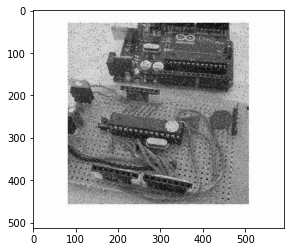

AttributeError: 'Image' object has no attribute 'toGray'

In [31]:
main()